In [15]:
# block of code will import the necessary packages and functions, as well as create a
# sample DataFrame with simulated data:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
# data: Laptop spec data
data = pd.DataFrame([[6000, '4GB', '128GB', 3],
# Understanding Customer Preferences with Conjoint Analysis
 [6000, '8GB', '512GB', 9],
[8000, '4GB', '512GB', 5],
[8000, '8GB', '128GB', 7],
[6000, '4GB', '128GB', 4]],
 columns=['price', 'memory',
 'storage', 'score'])
data.head()

,price,memory,storage,score
0,6000,4GB,128GB,3
1,6000,8GB,512GB,9
2,8000,4GB,512GB,5
3,8000,8GB,128GB,7
4,6000,4GB,128GB,4


The next code will separate our data into predictor and target variables:

In [4]:
X = data[[col for col in data.columns if col != 'score']]
y = data['score']
X.head()

,price,memory,storage
0,6000,4GB,128GB
1,6000,8GB,512GB
2,8000,4GB,512GB
3,8000,8GB,128GB
4,6000,4GB,128GB


next lines of code will create dummy variables using the encoded categorical variables:

In [5]:
X_dum = pd.get_dummies(X, columns=X.columns)
X_dum.head()

,price_6000,price_8000,memory_4GB,memory_8GB,storage_128GB,storage_512GB
0,True,False,True,False,True,False
1,True,False,False,True,False,True
2,False,True,True,False,False,True
3,False,True,False,True,True,False
4,True,False,True,False,True,False


 Python's statsmodels module to implement the OLS method of linear regression:

In [12]:
model = sm.OLS(y, sm.add_constant(X_dum.astype(np.float32)))
result = model.fit()
result.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     15.13
Date:                Fri, 17 May 2024   Prob (F-statistic):              0.186
Time:                        10:46:10   Log-Likelihood:                -1.3382
No. Observations:                   5   AIC:                             10.68
Df Residuals:                       1   BIC:                             9.114
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.4500      0.132     18.520      0.034       0.769       4.131
price_6000        1.3500      0.328      4.117      0.152      -2.816       5.516
price_8000        1.1000      0.346      3.175      0.194      -3.302       5.502
memory_4GB       -0.6500      0.328     -1.982      0.297      -4.816       3.516
memory_8GB        3.1000      0.346      8.949      0.071      -1.302       7.502
storage_128GB     0.3500      0.328      1.067      0.479      -3.816       4.516
storage_512GB     2.1000      0.346      6.062      0.104      -2.302       6.502
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.000
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.052
Skew:                          -0.000   Prob(JB):                        0.974
Kurtosis:                       2.500   Cond. No.                     2.08e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The input rank is higher than the number of observations.
[3] The smallest eigenvalue is 2.99e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

 we will use the results of the data and store the variable names, their weights, and p-values
in a DataFrame that later on we will use to plot the data:

In [13]:
data_res = pd.DataFrame({'name': result.params.keys(),
 'weight': result.params.values,
'p_val': result.pvalues})
data_res = data_res[1:]
data_res


,name,weight,p_val
price_6000,price_6000,1.35,0.151678
price_8000,price_8000,1.10,0.194224
memory_4GB,memory_4GB,-0.65,0.297414
memory_8GB,memory_8GB,3.10,0.070845
storage_128GB,storage_128GB,0.35,0.479226
storage_512GB,storage_512GB,2.10,0.104078


When looking at the p-value, if the significance level is below 5%, it can be an indication that the
variable is not statistically significant:

In [16]:
data_res = data_res.sort_values(by='weight')
data_res

,name,weight,p_val
memory_4GB,memory_4GB,-0.65,0.297414
storage_128GB,storage_128GB,0.35,0.479226
price_8000,price_8000,1.10,0.194224
price_6000,price_6000,1.35,0.151678
storage_512GB,storage_512GB,2.10,0.104078
memory_8GB,memory_8GB,3.10,0.070845


 shows the characteristics of the product ordered by relative weight. In this case,
users positively weigh the 8 GB memory, followed by the 128 GB storage:

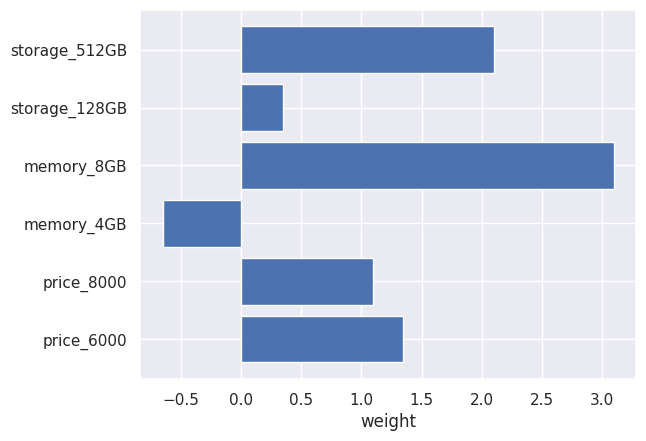

In [14]:
sns.set()
xbar = np.arange(len(data_res['weight']))
plt.barh(xbar, data_res['weight'])
plt.yticks(xbar, labels=data_res['name'])
plt.xlabel('weight')
plt.show()